In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [212]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import statistics

# Обзорка на данные

In [4]:
with open('/content/drive/My Drive/data/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')

In [ ]:
data1 = pd.read_excel('/content/drive/My Drive/data/0.Справочник БС_модули_блоки.xlsx')
data1.head()

In [ ]:
data2 = pd.read_excel('/content/drive/My Drive/data/0.Справочник групп позиций для графиков.xlsx')
data2.head()

In [ ]:
data3 = pd.read_excel('/content/drive/My Drive/data/0.Справочник перевод штуки в м3.xlsx')
data3.head()

In [17]:
data4 = pd.read_excel('/content/drive/My Drive/data/1.ОСНОВНОЙ Факт объемы_м3_2017_2022_по дням1.xlsx')
data4.head()

,"в кубах ,м3",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,резерв обработка,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,NaT,МСК,СЗ,Урал,всего Хранение,NaN,NaN,МСК,СЗ,Урал,...,СЗ,Урал,всего Хранение,NaN,NaN,NaN,МСК,СЗ,Урал,всего Обработка
1,2017-01-01,4727.21,1898.559166,1399.61,8025.379166,NaN,NaN,NaN,NaN,0.0,...,2000.0,1000.0,7500,NaN,NaN,январь,2500.0,800.0,200.0,3500
2,2017-01-02,4727.21,1898.559166,1399.61,8025.379166,NaN,NaN,NaN,NaN,0.0,...,2000.0,1000.0,7500,NaN,NaN,февраль,2500.0,800.0,400.0,3700
3,2017-01-03,4727.21,1898.559166,1399.61,8025.379166,NaN,NaN,NaN,NaN,0.0,...,2000.0,1000.0,7500,NaN,NaN,март,2500.0,800.0,400.0,3700
4,2017-01-04,4727.21,1898.559166,1399.61,8025.379166,NaN,NaN,NaN,NaN,0.0,...,2000.0,1000.0,7500,NaN,NaN,апрель,2500.0,800.0,400.0,3700


In [ ]:
data5 = pd.read_excel('/content/drive/My Drive/data/2.Факт расход в монтаж БС штуки 2021.xlsx')
data5.head()

In [19]:
data6 = pd.read_excel('/content/drive/My Drive/data/3.План БС в штуках(строка=штука)_2021.xlsx')
data6.head()

,№ Площадки,Регион,Диапазон,Тип БС,Дата ТЭ \n(ЧЧ.ММ.ГГ),Год \nплана,exМР
0,PL_10_0062,Республика Карелия,GSM-900,БС,2021-03-30,2021,МР Северо-Запад
1,PL_10_0062,Республика Карелия,UMTS-2100,БС,2021-03-30,2021,МР Северо-Запад
2,PL_10_0062,Республика Карелия,LTE-2600,БС,2021-03-30,2021,МР Северо-Запад
3,PL_10_0305,Республика Карелия,GSM-900,БС,2021-05-21,2021,МР Северо-Запад
4,PL_10_0305,Республика Карелия,UMTS-2100,БС,2021-05-21,2021,МР Северо-Запад


In [ ]:
data7 = pd.read_excel('/content/drive/My Drive/data/4.Ожидаемые поставки_Апрель2021.xlsx')
data7.head()

In [ ]:
data8 = pd.read_excel('/content/drive/My Drive/data/4.Ожидаемые поставки_Декабрь2020.xlsx')
data8.head()

In [ ]:
data9 = pd.read_excel('/content/drive/My Drive/data/4.Ожидаемые поставки_Январь2021.xlsx')
data9.head()

In [ ]:
data10 = pd.read_excel('/content/drive/My Drive/data/5.Расходные операции_янв-дек2021.xlsx')
data10.head()

In [ ]:
data11 = pd.read_excel('/content/drive/My Drive/data/6.Приходные операции_2020-2021.xlsx')
data11.head()

# Подготовка данных о расходе


In [210]:
ras = pd.read_excel('/content/drive/My Drive/data/cleaned/Rashod.xlsx', index_col = 'Дата операции', parse_dates = ['Дата операции'])
ras = ras[ras[typ] == i]
ras.head()

,Код позиции,Код организации источника,№ Площадки,Количество операции,Объем за единицу,Общий объем
Дата операции,,,,,,
2020-09-01,169.036.000001,304,10-0615 (300),-2.0,0.00040,0.00080
2020-09-01,248.020.000064,304,PL_10_00097 (300),-126.0,0.00100,0.12600
2020-09-01,248.020.000064,304,10-0001 (300),-230.0,0.00100,0.23000
2020-09-01,248.020.000065,304,78-1265 (300),-2892.0,0.00100,2.89200
2020-09-01,244.346.000468,304,PL_10_00097 (300),-1.0,0.01008,0.01008


In [18]:
print(ras.size)
ras = ras.dropna()
print(ras.size)

1154484
1148010


In [24]:
dates = []
vals = []

In [123]:
test = ras[ras.index == pd.to_datetime("2020-09", format='%Y-%m')]
len(test)

1191

In [19]:
mn = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]

In [26]:
for i in ["2021"]:
  for b in range(0, len(mn)):
    if b == 0:
      test = ras[ras.index <= pd.to_datetime(i+"-"+ mn[0]+"-"+"31", format='%Y-%m-%d') ]
    else:
      try:
        q = pd.to_datetime(i+"-"+ mn[b-1]+"-"+"31", format='%Y-%m-%d') 
      except Exception:
        try:
          q = pd.to_datetime(i+"-"+ mn[b-1]+"-"+"30", format='%Y-%m-%d') 
        except Exception:
          q = pd.to_datetime(i+"-"+ mn[b-1]+"-"+"28", format='%Y-%m-%d')
      try:
        r = pd.to_datetime(i+"-"+ mn[b]+"-"+"31", format='%Y-%m-%d')
      except Exception:
        try:
          r = pd.to_datetime(i+"-"+ mn[b]+"-"+"30", format='%Y-%m-%d')
        except Exception:
          r = pd.to_datetime(i+"-"+ mn[b]+"-"+"28", format='%Y-%m-%d')
      test = ras[q <= ras.index]
      test = test[test.index < r]
    if len(test) > 0:
      dates.append(i+"-"+ mn[b])
      vals.append(test['Общий объем'].sum())


In [27]:
sorted(dates)

['2021-01',
 '2021-02',
 '2021-03',
 '2021-04',
 '2021-05',
 '2021-06',
 '2021-07',
 '2021-08',
 '2021-09']

In [40]:
vals

[11935.538728923799,
 2017.9060650891,
 2270.0078150988998,
 1979.3687719151999,
 1444.2512619688,
 2435.8360039004,
 1396.7708019702,
 4349.7942705819005,
 319.3093809658001]

In [32]:
vals_kr = []

In [60]:
vals_kr

[123, 394, 735, 976, 1219, 1407, 1573, 2035, 1058, 2117, 1959, 2491]

In [50]:
vals_res = {}

In [34]:
ras = pd.read_excel('/content/drive/My Drive/data/cleaned/baz_2021.xlsx', index_col = 'Дата', parse_dates = ['Дата'])
ras.head()

,Тип БС,exМР
Дата,,
2021-01-01,БС,МР Северо-Запад
2021-01-01,БС,МР Москва
2021-01-01,БС,МР Москва
2021-01-01,БС,МР Москва
2021-01-03,БС,МР Урал


In [35]:
for i in ["2021"]:
  for b in range(0, len(mn)):
    if b == 0:
      test = ras[ras.index <= pd.to_datetime(i+"-"+ mn[0]+"-"+"31", format='%Y-%m-%d') ]
    else:
      try:
        q = pd.to_datetime(i+"-"+ mn[b-1]+"-"+"31", format='%Y-%m-%d') 
      except Exception:
        try:
          q = pd.to_datetime(i+"-"+ mn[b-1]+"-"+"30", format='%Y-%m-%d') 
        except Exception:
          q = pd.to_datetime(i+"-"+ mn[b-1]+"-"+"28", format='%Y-%m-%d')
      try:
        r = pd.to_datetime(i+"-"+ mn[b]+"-"+"31", format='%Y-%m-%d')
      except Exception:
        try:
          r = pd.to_datetime(i+"-"+ mn[b]+"-"+"30", format='%Y-%m-%d')
        except Exception:
          r = pd.to_datetime(i+"-"+ mn[b]+"-"+"28", format='%Y-%m-%d')
      test = ras[q <= ras.index]
      test = test[test.index < r]
    if len(test) > 0:
      vals_kr.append(len(test['Тип БС']))

In [52]:
for i in range(len(vals)-1):
  vals_res[dates[i]] = (vals[i] / vals_kr[i])

In [58]:
import statistics

In [59]:
statistics.mean(vals_res.values())

14.15205557588831

14.15205557588831

# Значения для каждого склада

In [213]:
for p in ['МР Москва', 'МР Северо-Запад', 'МР Урал']:
  ras = pd.read_excel('/content/drive/My Drive/data/cleaned/Rashod.xlsx', index_col = 'Дата операции', parse_dates = ['Дата операции'])
  if p == 'МР Москва':
    ras = ras[ras["Код организации источника"] == 101]
  if p == 'МР Северо-Запад':
    ras = ras[ras["Код организации источника"] == 304]
  if p == 'МР Урал':
    ras = ras[ras["Код организации источника"] == 702]
  ras = ras.dropna()
  dates = []
  vals = []
  mn = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]
  for i in ["2021"]:
    for b in range(0, len(mn)):
      if b == 0:
        test = ras[ras.index <= pd.to_datetime(i+"-"+ mn[0]+"-"+"31", format='%Y-%m-%d') ]
      else:
        try:
          q = pd.to_datetime(i+"-"+ mn[b-1]+"-"+"31", format='%Y-%m-%d') 
        except Exception:
          try:
            q = pd.to_datetime(i+"-"+ mn[b-1]+"-"+"30", format='%Y-%m-%d') 
          except Exception:
            q = pd.to_datetime(i+"-"+ mn[b-1]+"-"+"28", format='%Y-%m-%d')
        try:
          r = pd.to_datetime(i+"-"+ mn[b]+"-"+"31", format='%Y-%m-%d')
        except Exception:
          try:
            r = pd.to_datetime(i+"-"+ mn[b]+"-"+"30", format='%Y-%m-%d')
          except Exception:
            r = pd.to_datetime(i+"-"+ mn[b]+"-"+"28", format='%Y-%m-%d')
        test = ras[q <= ras.index]
        test = test[test.index < r]
      if len(test) > 0:
        dates.append(i+"-"+ mn[b])
        vals.append(test['Общий объем'].sum())
  vals_kr = []
  vals_res = {}
  ras = pd.read_excel('/content/drive/My Drive/data/cleaned/baz_2021.xlsx', index_col = 'Дата', parse_dates = ['Дата'])
  ras = ras[ras["exМР"] == p]
  for i in ["2021"]:
    for b in range(0, len(mn)):
      if b == 0:
        test = ras[ras.index <= pd.to_datetime(i+"-"+ mn[0]+"-"+"31", format='%Y-%m-%d') ]
      else:
        try:
          q = pd.to_datetime(i+"-"+ mn[b-1]+"-"+"31", format='%Y-%m-%d') 
        except Exception:
          try:
            q = pd.to_datetime(i+"-"+ mn[b-1]+"-"+"30", format='%Y-%m-%d') 
          except Exception:
            q = pd.to_datetime(i+"-"+ mn[b-1]+"-"+"28", format='%Y-%m-%d')
        try:
          r = pd.to_datetime(i+"-"+ mn[b]+"-"+"31", format='%Y-%m-%d')
        except Exception:
          try:
            r = pd.to_datetime(i+"-"+ mn[b]+"-"+"30", format='%Y-%m-%d')
          except Exception:
            r = pd.to_datetime(i+"-"+ mn[b]+"-"+"28", format='%Y-%m-%d')
        test = ras[q <= ras.index]
        test = test[test.index < r]
      if len(test) > 0:
        vals_kr.append(len(test['Тип БС']))
  for i in range(len(vals)-1):
    vals_res[dates[i]] = (vals[i] / vals_kr[i])
  print(statistics.mean(vals_res.values()))


9.105815696019702
25.600395294891136
13.149119098565656


In [ ]:
for i in ["2021"]:
  for b in range(0, len(mn)):
    if b == 0:
      test = ras[ras.index <= pd.to_datetime(i+"-"+ mn[0]+"-"+"31", format='%Y-%m-%d') ]
    else:
      try:
        q = pd.to_datetime(i+"-"+ mn[b-1]+"-"+"31", format='%Y-%m-%d') 
      except Exception:
        try:
          q = pd.to_datetime(i+"-"+ mn[b-1]+"-"+"30", format='%Y-%m-%d') 
        except Exception:
          q = pd.to_datetime(i+"-"+ mn[b-1]+"-"+"28", format='%Y-%m-%d')
      try:
        r = pd.to_datetime(i+"-"+ mn[b]+"-"+"31", format='%Y-%m-%d')
      except Exception:
        try:
          r = pd.to_datetime(i+"-"+ mn[b]+"-"+"30", format='%Y-%m-%d')
        except Exception:
          r = pd.to_datetime(i+"-"+ mn[b]+"-"+"28", format='%Y-%m-%d')
      test = ras[q <= ras.index]
      test = test[test.index < r]
    if len(test) > 0:
      dates.append(i+"-"+ mn[b])
      vals.append(test['Общий объем'].sum())


In [ ]:
sorted(dates)

['2021-01',
 '2021-02',
 '2021-03',
 '2021-04',
 '2021-05',
 '2021-06',
 '2021-07',
 '2021-08',
 '2021-09']

In [ ]:
vals

[11935.538728923799,
 2017.9060650891,
 2270.0078150988998,
 1979.3687719151999,
 1444.2512619688,
 2435.8360039004,
 1396.7708019702,
 4349.7942705819005,
 319.3093809658001]

In [ ]:
vals_kr = []

In [ ]:
vals_kr

[123, 394, 735, 976, 1219, 1407, 1573, 2035, 1058, 2117, 1959, 2491]

In [ ]:
vals_res = {}

In [ ]:
ras = pd.read_excel('/content/drive/My Drive/data/cleaned/baz_2021.xlsx', index_col = 'Дата', parse_dates = ['Дата'])
ras = ras[ras["exМР"] == i]
ras.head()

,Тип БС,exМР
Дата,,
2021-01-01,БС,МР Северо-Запад
2021-01-01,БС,МР Москва
2021-01-01,БС,МР Москва
2021-01-01,БС,МР Москва
2021-01-03,БС,МР Урал


In [ ]:
for i in ["2021"]:
  for b in range(0, len(mn)):
    if b == 0:
      test = ras[ras.index <= pd.to_datetime(i+"-"+ mn[0]+"-"+"31", format='%Y-%m-%d') ]
    else:
      try:
        q = pd.to_datetime(i+"-"+ mn[b-1]+"-"+"31", format='%Y-%m-%d') 
      except Exception:
        try:
          q = pd.to_datetime(i+"-"+ mn[b-1]+"-"+"30", format='%Y-%m-%d') 
        except Exception:
          q = pd.to_datetime(i+"-"+ mn[b-1]+"-"+"28", format='%Y-%m-%d')
      try:
        r = pd.to_datetime(i+"-"+ mn[b]+"-"+"31", format='%Y-%m-%d')
      except Exception:
        try:
          r = pd.to_datetime(i+"-"+ mn[b]+"-"+"30", format='%Y-%m-%d')
        except Exception:
          r = pd.to_datetime(i+"-"+ mn[b]+"-"+"28", format='%Y-%m-%d')
      test = ras[q <= ras.index]
      test = test[test.index < r]
    if len(test) > 0:
      vals_kr.append(len(test['Тип БС']))

In [ ]:
for i in range(len(vals)-1):
  vals_res[dates[i]] = (vals[i] / vals_kr[i])

In [ ]:
statistics.mean(vals_res.values())

14.15205557588831

# Построение по датасету ПланаБС

In [165]:
ras = pd.read_excel('/content/drive/My Drive/data/cleaned/baz_2021.xlsx', index_col = 'Дата', parse_dates = ['Дата'])
ras.sort_index().head()

,Тип БС,exМР
Дата,,
2021-01-01,БС,МР Северо-Запад
2021-01-01,БС,МР Москва
2021-01-01,БС,МР Москва
2021-01-01,БС,МР Москва
2021-01-03,БС,МР Урал


In [166]:
Basic_capacity = 20000
start_date = ras.index[0] - timedelta(days=7)
end_date = ras.index[len(ras)-1]
dti = pd.date_range(start_date, periods=7+len(set(ras.index))-1, freq="D")

In [167]:
start_date

Timestamp('2020-12-25 00:00:00')

In [168]:
value = []
value_temp = []

In [169]:
pogr = []
shell = []
otgr = []

for i in dti:
  tm_d = 0
  if len(ras[ras.index == i]) != 0:
    for b in otgr:
       tm_d += (14.15205557588831/2)
       Basic_capacity -= (14.15205557588831/2)
    otgr = []
    for b in range(len(shell)):
      if shell[b] > 0:
        shell[b]-=1
      elif shell[b]==0:
        otgr.append(14.15205557588831/2)
        tm_d += (14.15205557588831/2)
        Basic_capacity -= (14.15205557588831/2)
        shell[b]-=1
    for b in pogr:
      tm_d += (14.15205557588831/2)
      Basic_capacity+=(14.15205557588831/2)
      shell.append(3)
    pogr = []
    for b in range(len(ras[ras.index == i])):
      Basic_capacity+=(14.15205557588831/2)
      pogr.append(14.15205557588831/2)
      tm_d += (14.15205557588831/2)
  value.append(Basic_capacity)
  value_temp.append(tm_d)
  tm_d = 0



In [ ]:
value

In [ ]:
value_temp

In [186]:
def to_pandas(value, value_temp, dti):
  return pd.DataFrame([dti, value, value_temp], index=["Date", "Volume", "Volume_temp"]).T

In [189]:
to_pandas(value, value_temp, dti).to_csv("result.csv", sep=';')

# Function PlanBS_to_Zagruzka

In [214]:
import pandas as pd
import statistics
def plan_to_zagr(dt, date="Date", typ = 'exМР'):
  dat = pd.read_excel(dt, index_col = date, parse_dates = [date])
  dat = dat.sort_index()
  rek = []
  for i in ['МР Москва', 'МР Северо-Запад', 'МР Урал']:
    if i == 'МР Москва':
      Basic_capacity = 10800
      k = 9.105815696019702
    if i == 'МР Северо-Запад':
      Basic_capacity = 8000
      k = 25.600395294891136
    if i == 'МР Урал':
      Basic_capacity = 3000
      k = 13.149119098565656
    ras = dat[dat[typ] == i]
    if len(ras) == 0:
      continue
    start_date = ras.index[0] - timedelta(days=7)
    end_date = ras.index[len(ras)-1]
    dti = pd.date_range(start_date, periods=7+len(set(ras.index))-1, freq="D")
    value = []
    value_temp = []
    pogr = []
    shell = []
    otgr = []
    for i in dti:
     tm_d = 0
     if len(ras[ras.index == i]) != 0:
       for b in otgr:
          tm_d += (k/2)
          Basic_capacity -= (k/2)
       otgr = []
       for b in range(len(shell)):
         if shell[b] > 0:
           shell[b]-=1
         elif shell[b]==0:
           otgr.append(k/2)
           tm_d += (k/2)
           Basic_capacity -= (k/2)
           shell[b]-=1
       for b in pogr:
         tm_d += (k/2)
         Basic_capacity+=(k/2)
         shell.append(3)
       pogr = []
       for b in range(len(ras[ras.index == i])):
         Basic_capacity+=(k/2)
         pogr.append(k/2)
         tm_d += (k/2)
     value.append(Basic_capacity)
     value_temp.append(tm_d)
     tm_d = 0
    rek.append(to_pandas(value, value_temp, dti))
  return rek

In [220]:
results = plan_to_zagr('/content/drive/My Drive/data/cleaned/baz_2021.xlsx', date='Дата')

In [221]:
results[0]

,Date,Volume,Volume_temp
0,2020-12-25,10800,0
1,2020-12-26,10800,0
2,2020-12-27,10800,0
3,2020-12-28,10800,0
4,2020-12-29,10800,0
...,...,...,...
258,2021-09-09,10968.45759,186.669222
259,2021-09-10,10963.904683,86.505249
260,2021-09-11,10963.904683,0
261,2021-09-12,10963.904683,0


# Time series test

In [90]:
data1 = pd.read_excel('/content/drive/My Drive/data/volume.xlsx', index_col = 'Date', parse_dates = ['Date'])
data1 = data1.dropna()
data1.head()

,Value
Date,
2017-01-01,8025.379166
2017-01-02,8025.379166
2017-01-03,8025.379166
2017-01-04,8025.379166
2017-01-05,8025.379166


In [ ]:
data1 = pd.read_excel('/content/drive/My Drive/data/volume.xlsx', parse_dates = ['Date'])
data1 = data1.dropna()
data1.head()

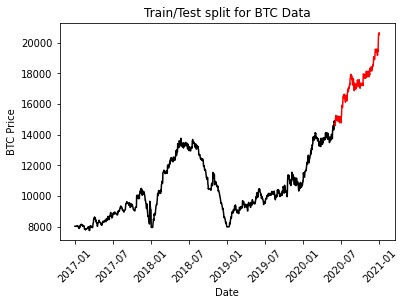

In [91]:
train = data1[data1.index < pd.to_datetime("2020-06-01", format='%Y-%m-%d')]
test = data1[data1.index > pd.to_datetime("2020-06-01", format='%Y-%m-%d')]

plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")
plt.show()

In [6]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [92]:
y = train['Value']

In [ ]:
ARMAmodel = SARIMAX(y, order = (1, 0, 1))
ARMAmodel = ARMAmodel.fit()

In [113]:
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [ ]:
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["Value"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

In [10]:
from statsmodels.tsa.arima.model import ARIMA

In [87]:
test2 = pd.read_excel('/content/drive/My Drive/data/test.xlsx', index_col = 'Date',parse_dates = ['Date'])
test2 = test2.dropna()
test2.head()

,Value
Date,
2021-01-01,20097.89116
2021-01-02,20097.89116
2021-01-03,20097.89116
2021-01-04,20097.89116
2021-01-05,20097.89116


In [54]:
y = data1['Value']

In [ ]:
!pip install statsmodels==0.11.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('

RMSE:  540.9885776814643


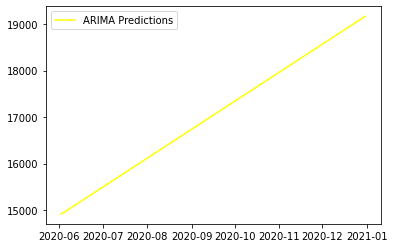

In [93]:
ARIMAmodel = ARIMA(y, order = (3, 2, 2))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
plt.plot(y_pred_out, color='Yellow', label = 'ARIMA Predictions')
plt.legend()


import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["Value"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

In [ ]:
SARIMAXmodel = SARIMAX(y, order = (3, 2, 2), seasonal_order=(2,2,2,6))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
plt.plot(y_pred_out, color='Yellow', label = 'SARIMAX Predictions')
plt.legend()


import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["Value"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

In [39]:
import matplotlib

In [95]:
y_pred_2 = ARIMAmodel.get_forecast(len(test.index)+365)
pred_2 = y_pred_2.conf_int(alpha = 0.05)
pred_2["Predictions"] = ARIMAmodel.predict(start = pred_2.index[0], end = pred_2.index[-1])
pred_2.index = pd.arrays.DatetimeArray(np.hstack([test.index.values,test2.index.values])[:578])
y_pred_out = pred_2["Predictions"] 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


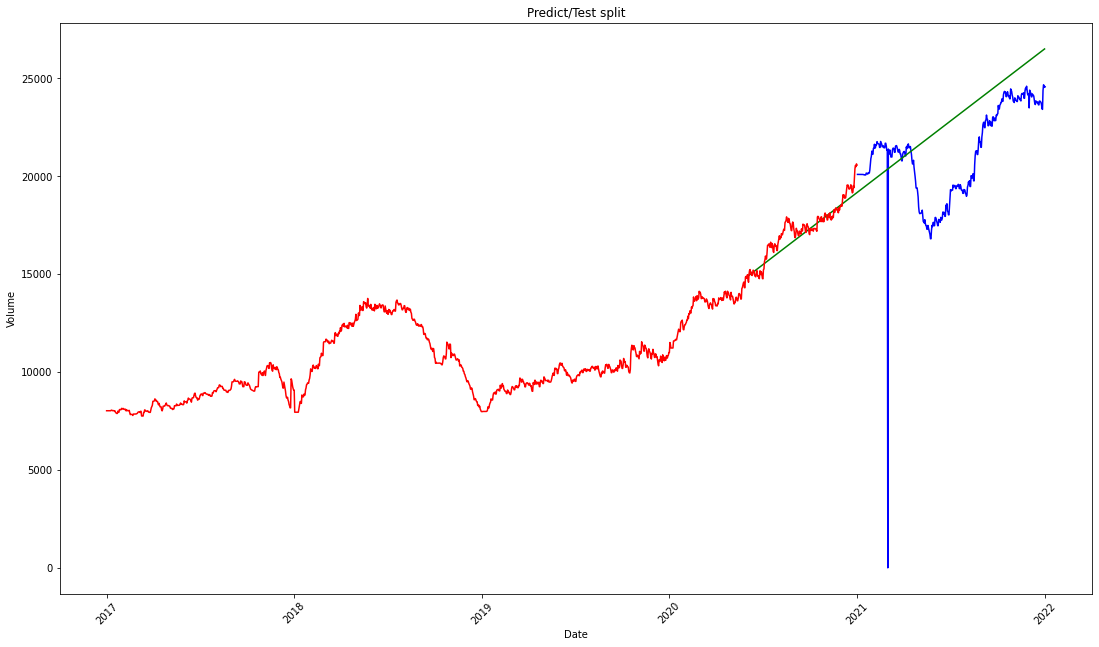

In [97]:
train = data1[data1.index < pd.to_datetime("2020-06-01", format='%Y-%m-%d')]

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)
plt.plot(test2, color = "blue")
plt.plot(pred_2["Predictions"], color = "green")
plt.plot(data1, color = "red")
plt.ylabel('Volume')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Predict/Test split")
plt.show()

In [36]:
from matplotlib.pyplot import figure

figure(figsize=(8, 12), dpi=80)

<Figure size 640x960 with 0 Axes>

<Figure size 640x960 with 0 Axes>

In [16]:
data1.set_index('Date', inplace = True)

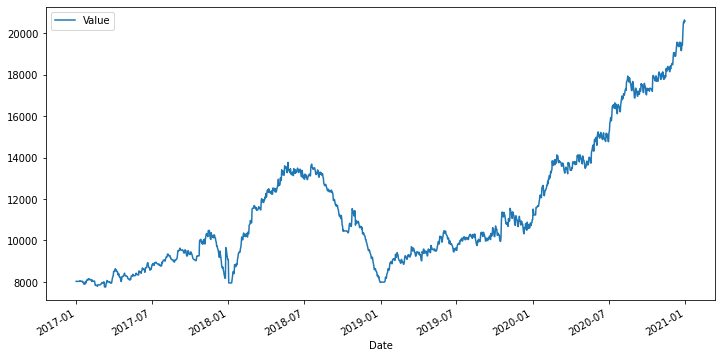

In [23]:
data1.plot(figsize=(12,6))

In [22]:
data1.head()

,Value
Date,
2017-01-01,8025.379166
2017-01-02,8025.379166
2017-01-03,8025.379166
2017-01-04,8025.379166
2017-01-05,8025.379166


In [ ]:
data1['2017-01':'2018-01'].plot()

In [12]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [ ]:
model = sm.tsa.ARIMA(data1, order=(1,1,1)).fit(full_output=False, disp=0)

In [ ]:
pred = model.predict('2021-01-21','2021-12-31')

In [ ]:
mymodel = ARIMA(data1.Value, order =(1, 1, 1),dates=data1.Date) 
modelfit = mymodel.fit(disp = 0)

In [36]:
import matplotlib.pyplot as plt

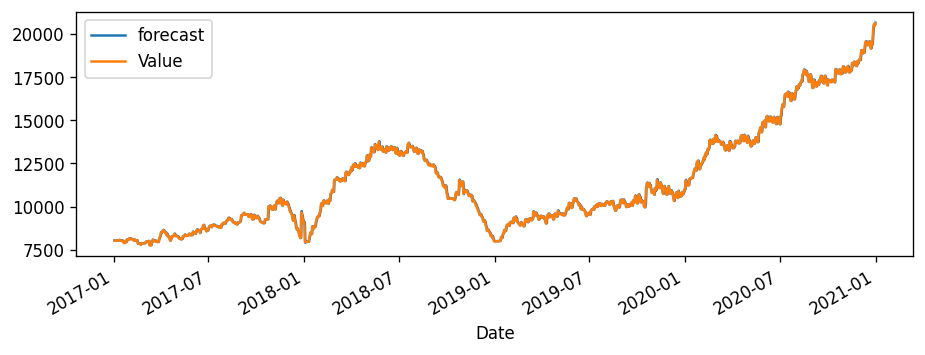

In [47]:
plt.rcParams.update({'figure.figsize' :(9,3), 'figure.dpi' : 120})
res = modelfit.plot_predict(dynamic = False) 
plt.show()

In [50]:
res = modelfit.predict()
res

Date
2017-01-02     8.608632
2017-01-03     8.202077
2017-01-04     8.384022
2017-01-05     8.296622
2017-01-06     8.337271
                ...    
2020-12-27    38.978241
2020-12-28    15.821505
2020-12-29    13.317778
2020-12-30     2.954117
2020-12-31    17.888031
Length: 1457, dtype: float64